In [14]:
install.packages("ggrepel", repos="http://cran.us.r-project.org")

package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tulik\AppData\Local\Temp\RtmpCWFjv6\downloaded_packages


In [28]:
install.packages("ez",  repos="http://cran.us.r-project.org", dependencies = TRUE)

package 'ez' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tulik\AppData\Local\Temp\RtmpCWFjv6\downloaded_packages


In [31]:
install.packages("scales",  repos="http://cran.us.r-project.org")

package 'scales' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'scales'"


The downloaded binary packages are in
	C:\Users\tulik\AppData\Local\Temp\RtmpCWFjv6\downloaded_packages


In [45]:
library(ggplot2)
library("ggrepel")
library(ez)

<html><b>Readinh housing data</b></html>

In [1]:
housing <- read.csv("dataSets/landdata-states.csv")
head(housing[1:5])

State,region,Date,Home.Value,Structure.Cost
AK,West,2010.25,224952,160599
AK,West,2010.50,225511,160252
AK,West,2009.75,225820,163791
AK,West,2010.00,224994,161787
AK,West,2008.00,234590,155400
AK,West,2008.25,233714,157458


<html><b>Base graphics histogram</b></html>

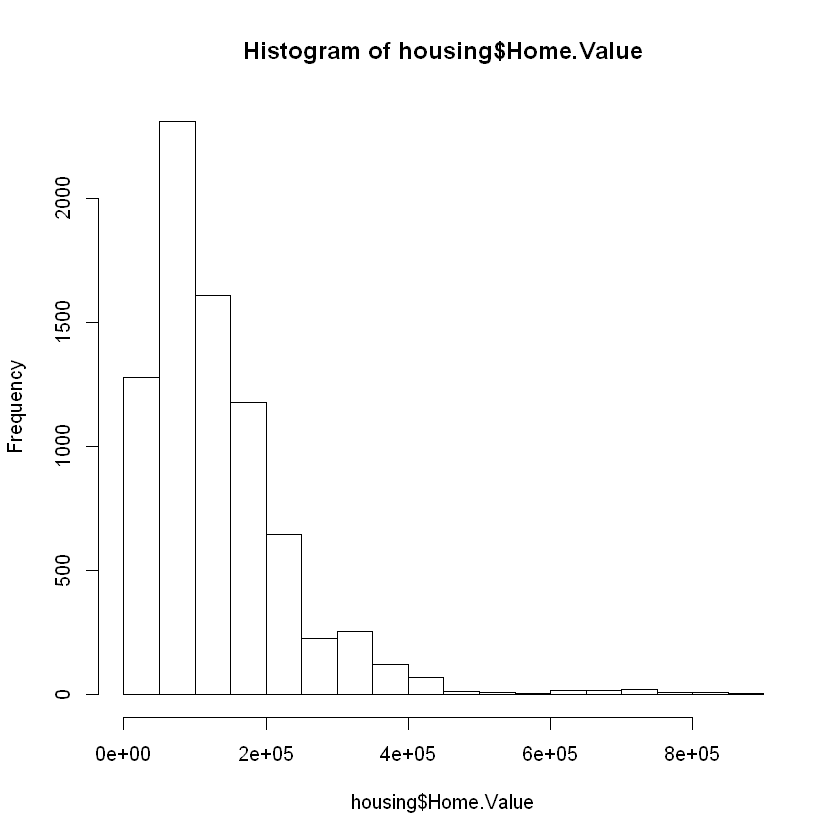

In [3]:
hist(housing$Home.Value)

<html><b>ggplot2 histogram</b></html>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


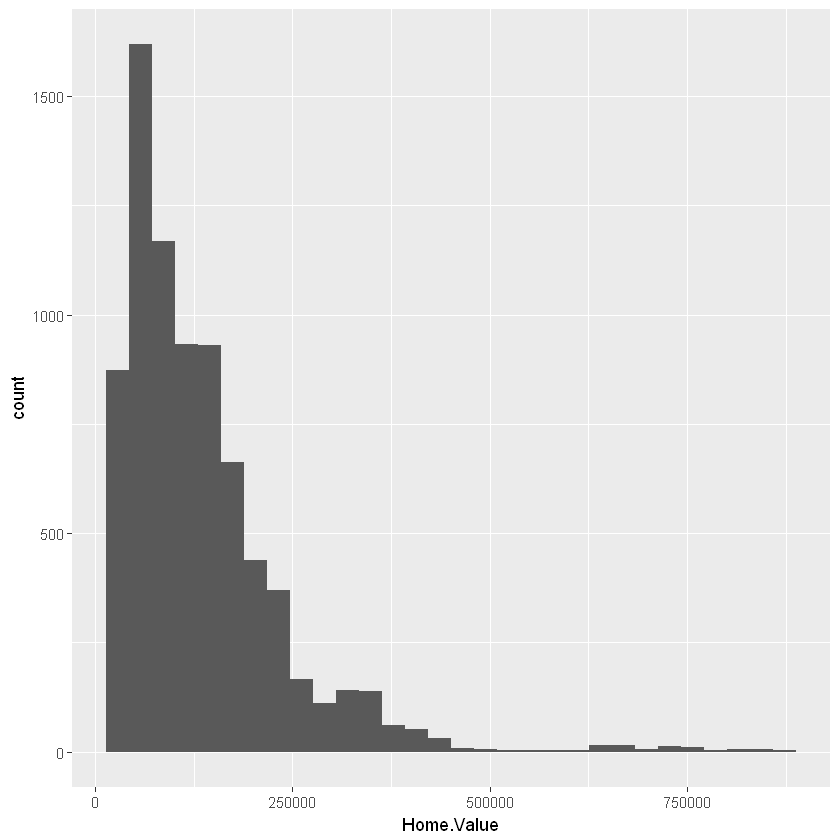

In [4]:
ggplot(housing, aes(x = Home.Value)) +
  geom_histogram()

<html><b>Base colored scatter plot</b></html>

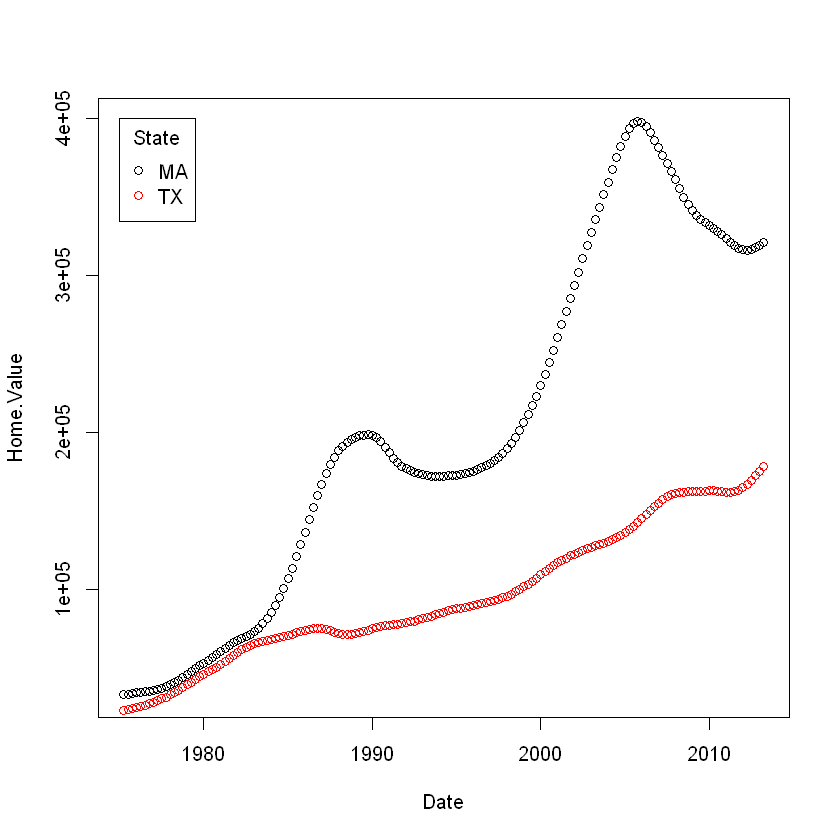

In [5]:
plot(Home.Value ~ Date,
     data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red",
       data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

<html><b>ggplot2 colored scatter plot</b></html>

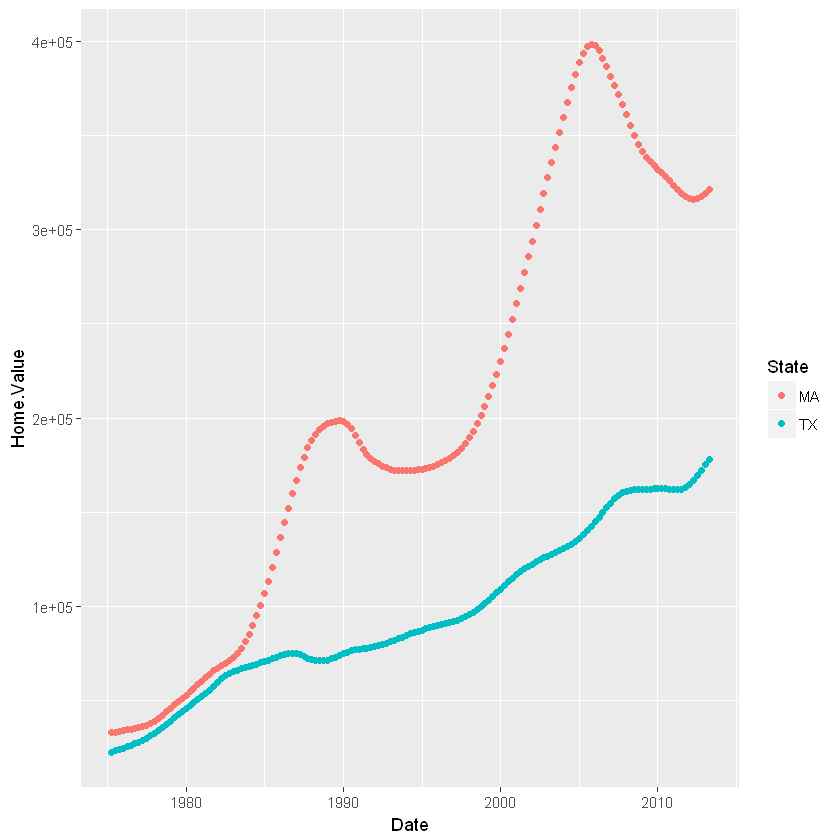

In [6]:
ggplot(subset(housing, State %in% c("MA", "TX")),
       aes(x=Date,
           y=Home.Value,
           color=State))+
  geom_point()

<html><b>geom_point example:</b></html>

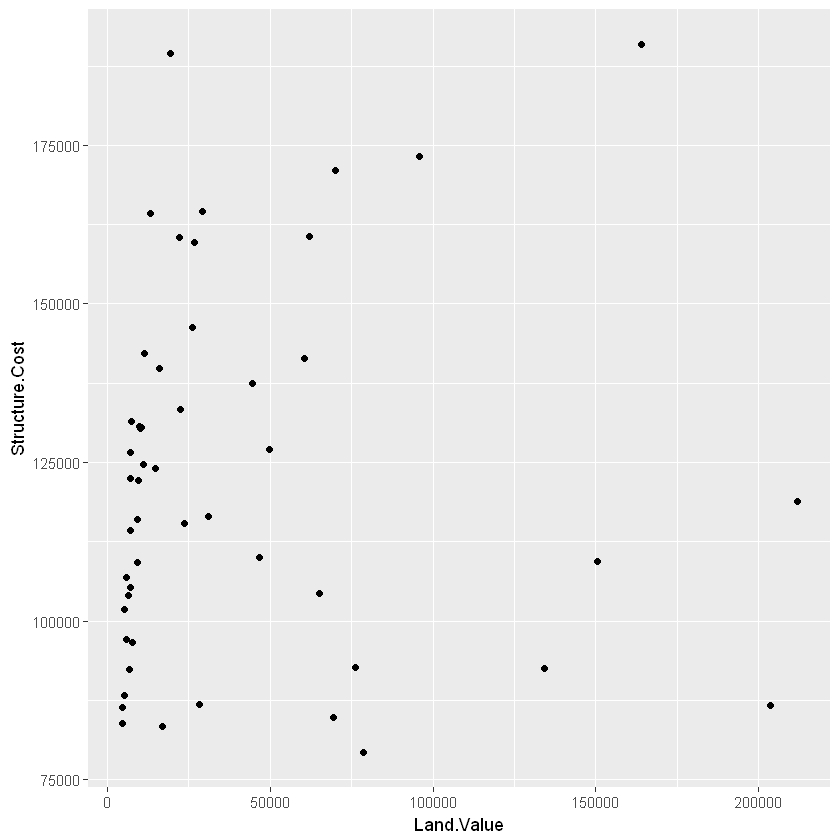

In [7]:
hp2001Q1 <- subset(housing, Date == 2001.25) 
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = Land.Value)) +
  geom_point()

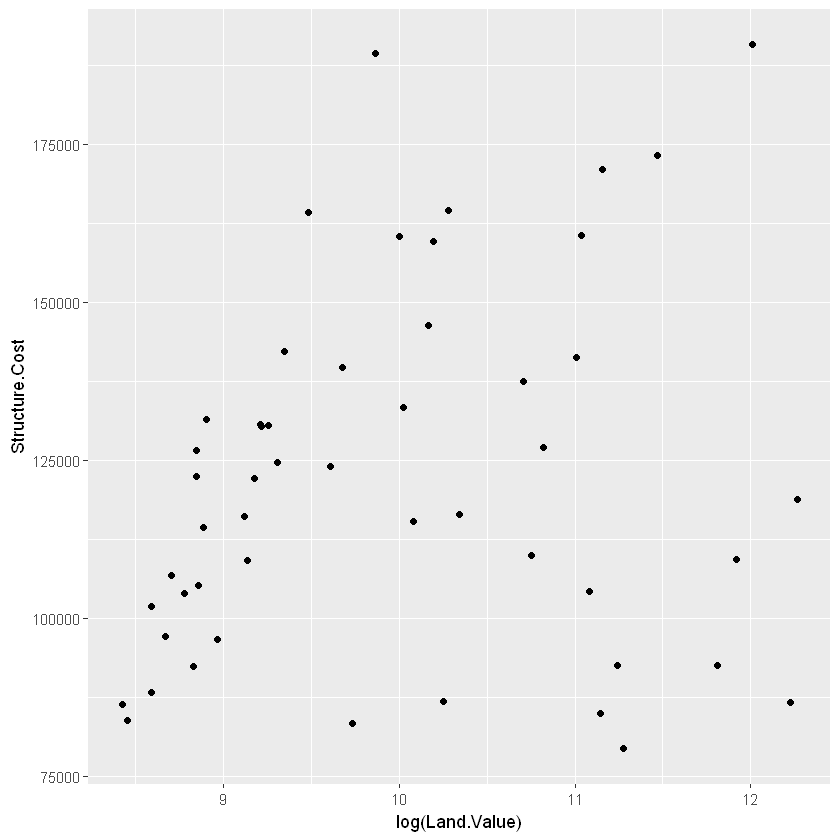

In [8]:
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

<html><b>Lines Prediction</b></html>

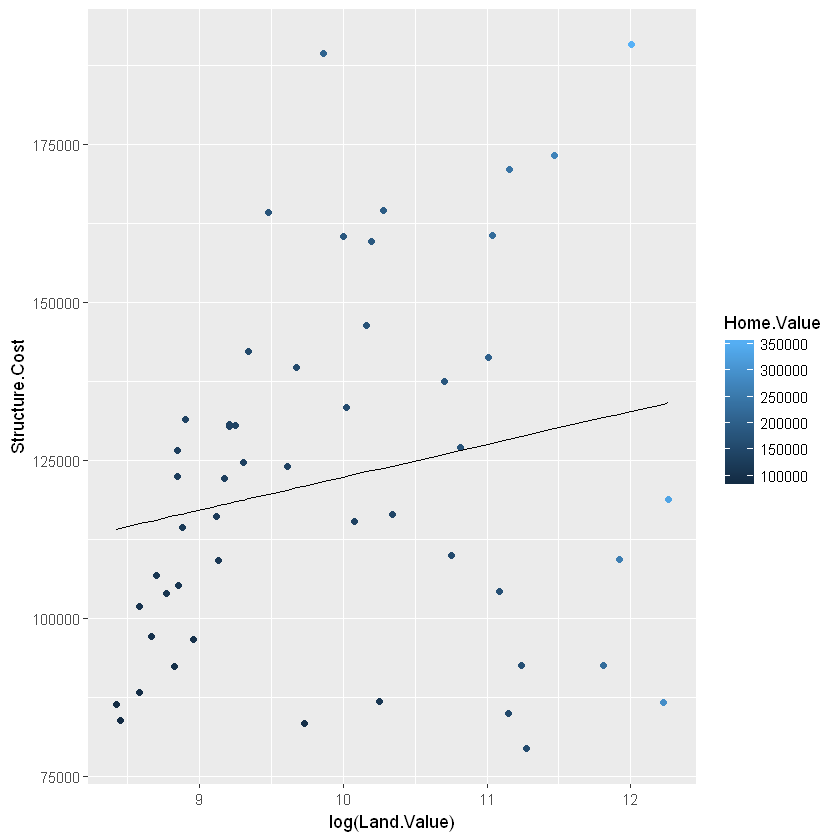

In [9]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))

p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))

p1 + geom_point(aes(color = Home.Value)) +
  geom_line(aes(y = pred.SC))

<html><b>Smooth Geom example:</b></html>

`geom_smooth()` using method = 'loess'


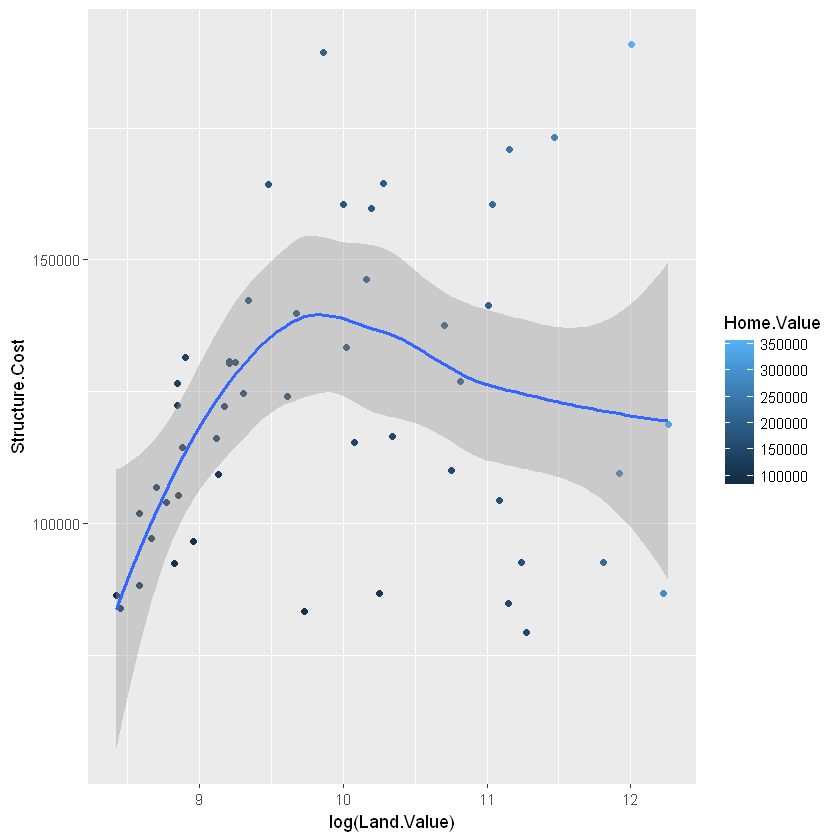

In [10]:
p1 +
  geom_point(aes(color = Home.Value)) +
  geom_smooth()

<html><b>Text (Label Points) example:</b></html>

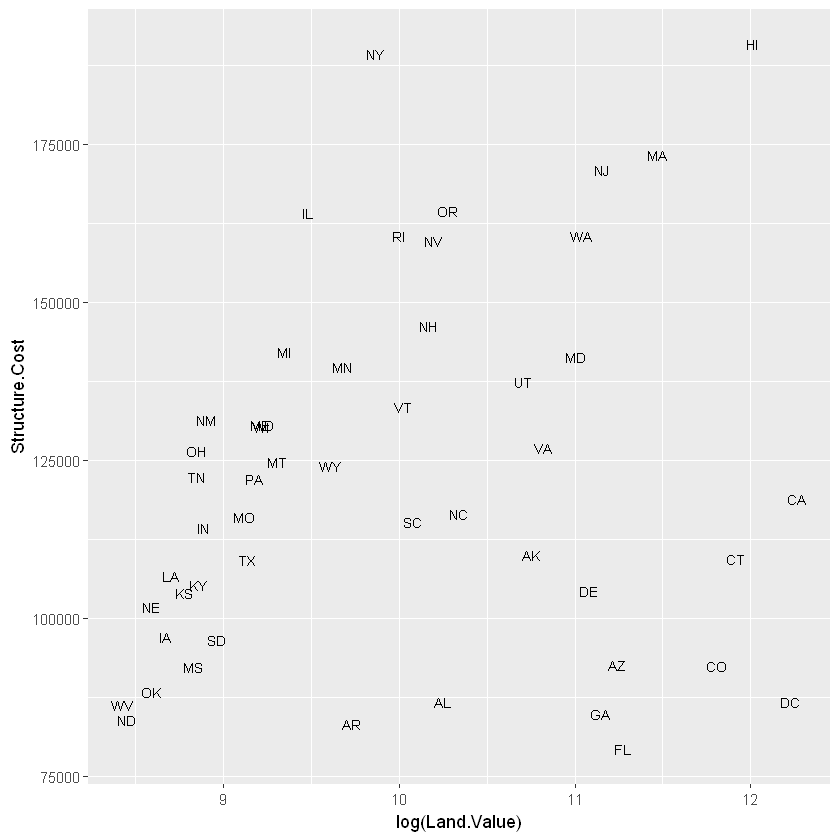

In [11]:
p1 + 
  geom_text(aes(label=State), size = 3)

<html><b>Aesthetic Mapping VS Assignment:</b></html>

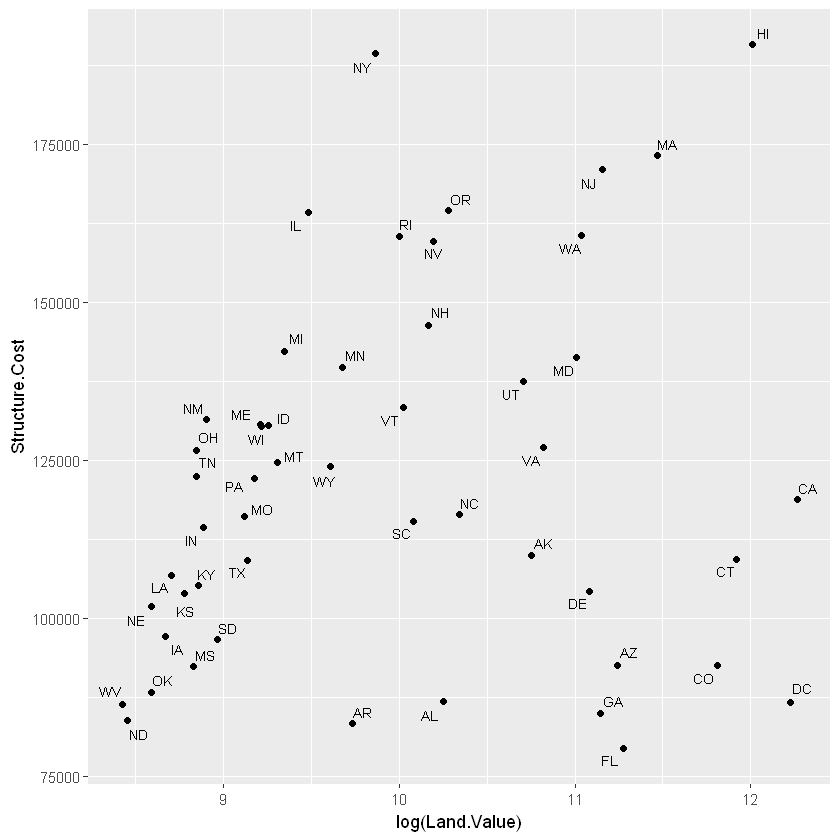

In [16]:
p1 + 
  geom_point() + 
  geom_text_repel(aes(label=State), size = 3)

<html><b>Mapping Variables To Other Aesthetics:</b></html>

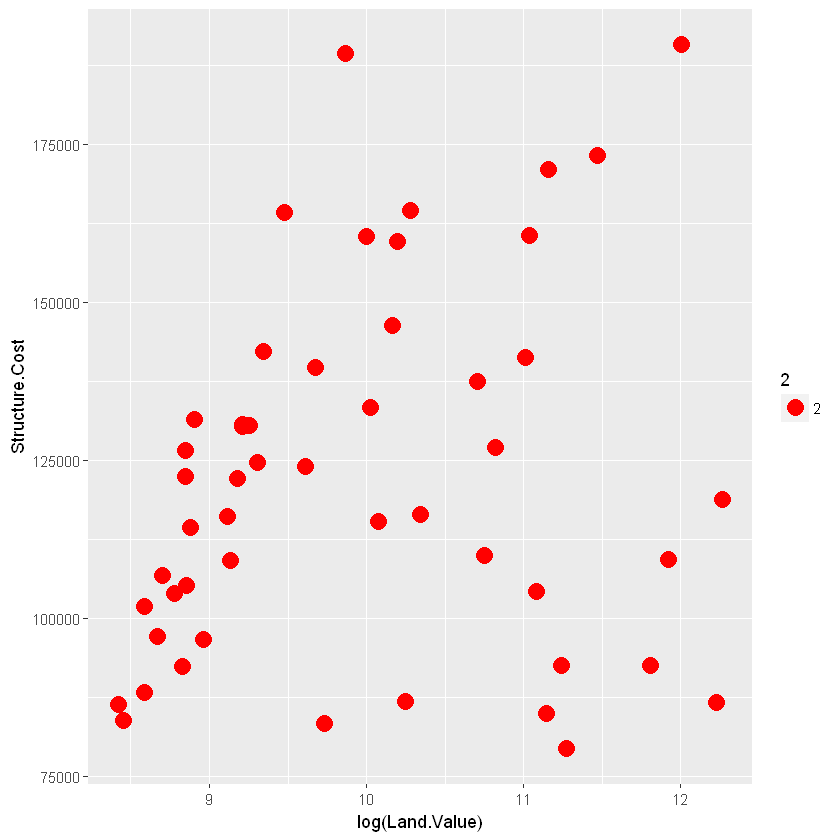

In [17]:
p1 +
  geom_point(aes(size = 2),# incorrect! 2 is not a variable
             color="red") # this is fine -- all points red

Warning message:
"Removed 1 rows containing missing values (geom_point)."

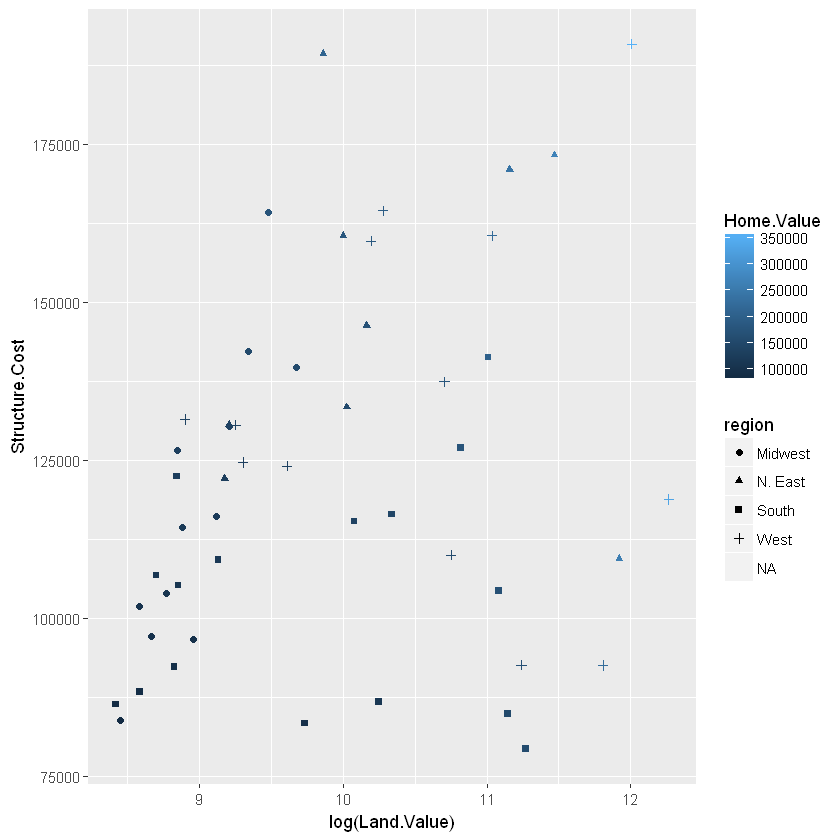

In [18]:
p1 +
  geom_point(aes(color=Home.Value, shape = region))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


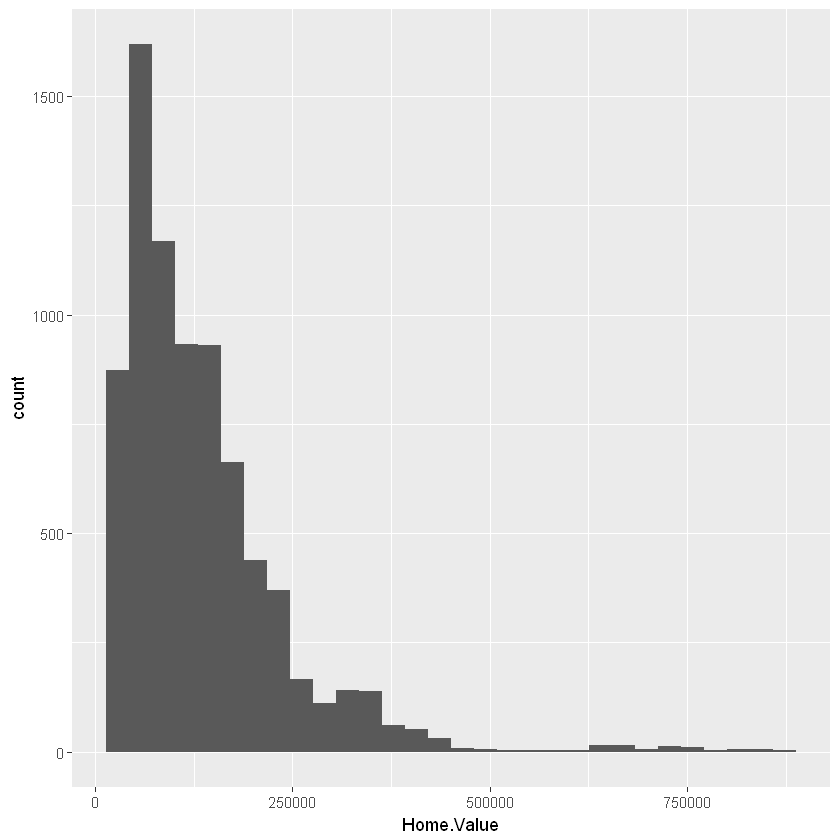

In [19]:
p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()

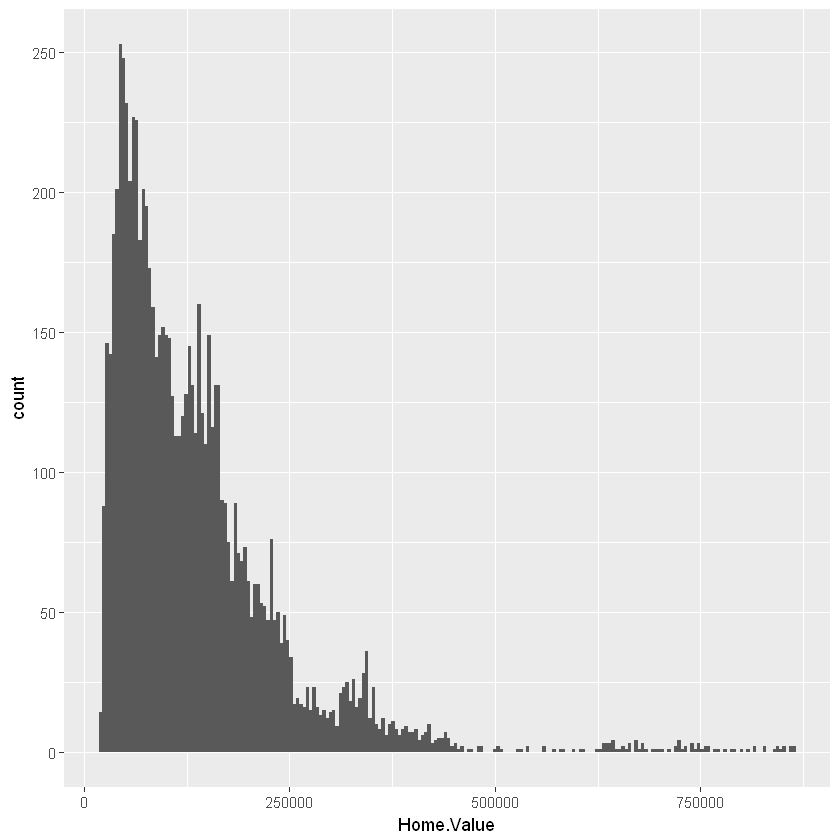

In [20]:
p2 + geom_histogram(stat = "bin", binwidth=4000)

In [21]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))

,State,Home.Value
1,AK,147385.14
2,AL,92545.22
3,AR,82076.84
4,AZ,140755.59
5,CA,282808.08
6,CO,158175.99
46,VA,155391.44
47,VT,132394.60
48,WA,178522.58
49,WI,108359.45


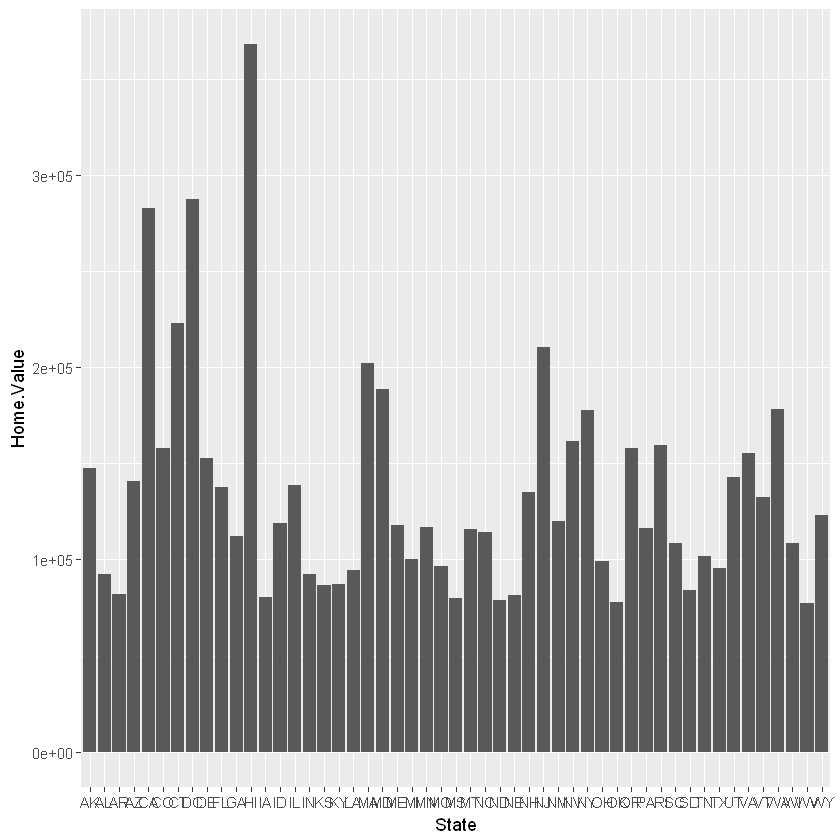

In [23]:
ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar(stat="identity")

<html><b>Scale Modification Examples</b></html>

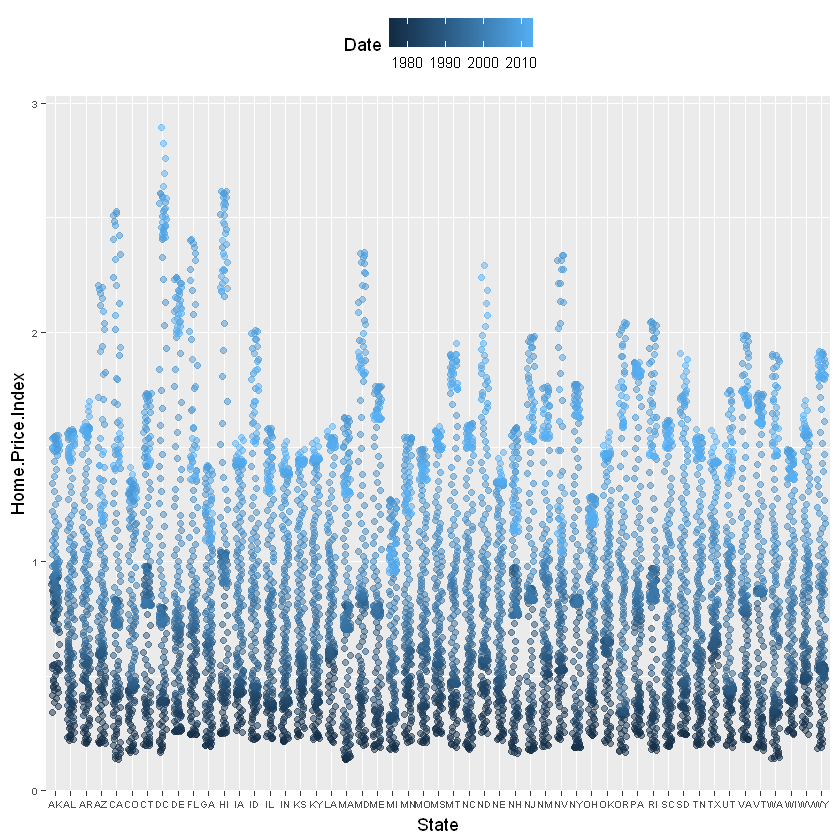

In [24]:
p3 <- ggplot(housing,
             aes(x = State,
                 y = Home.Price.Index)) + 
        theme(legend.position="top",
              axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date),
                       alpha = 0.5,
                       size = 1.5,
                       position = position_jitter(width = 0.25, height = 0)))

<html><b>For the x axis and color scales</b></html>

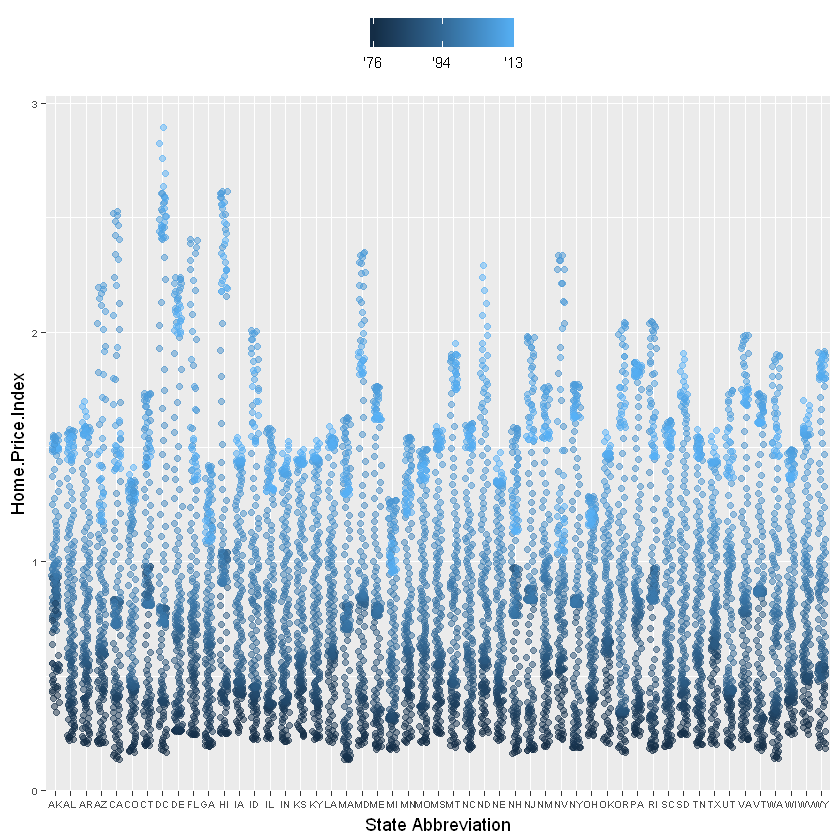

In [25]:
p4 + scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"))

<html><b>Next change the low and high values to blue and red:</b></html>

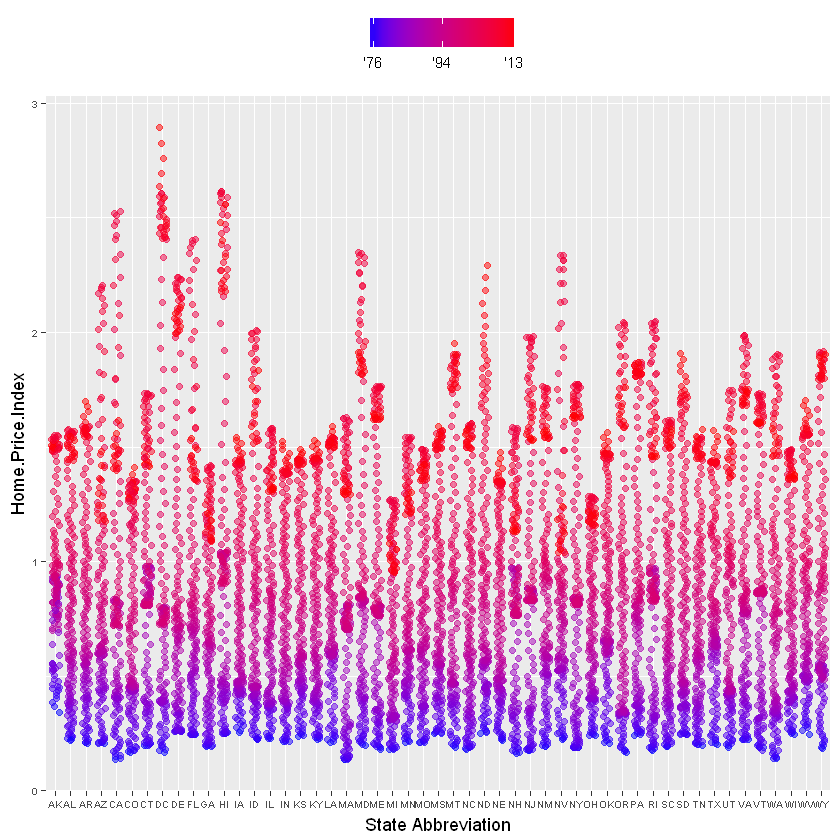

In [26]:
p4 +
  scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")

<html><b>Using different color scales</b></html>

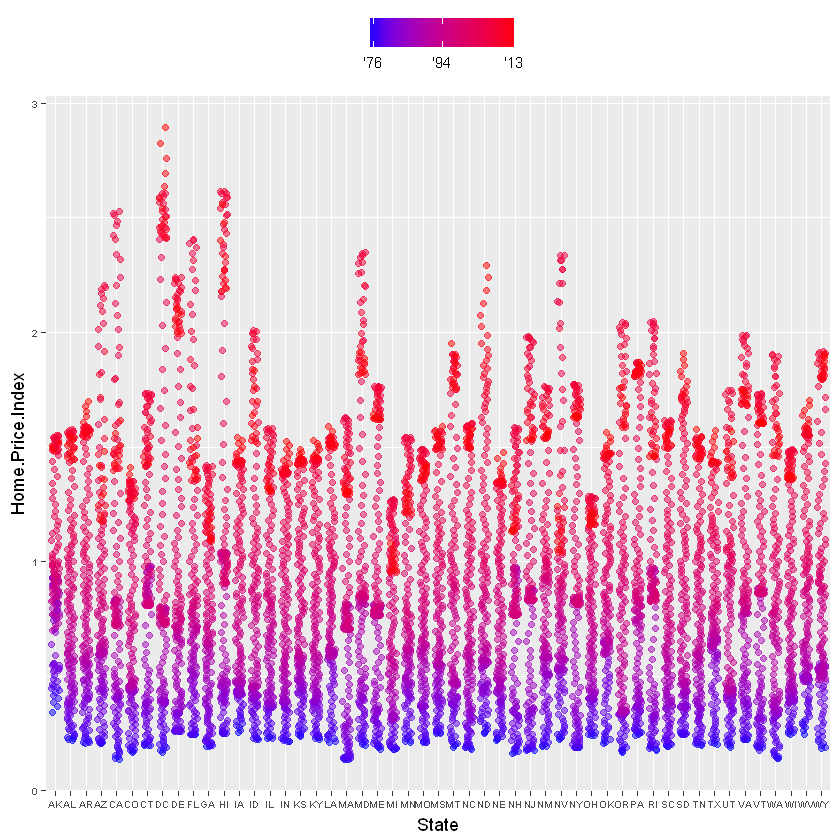

In [43]:
p4 +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")

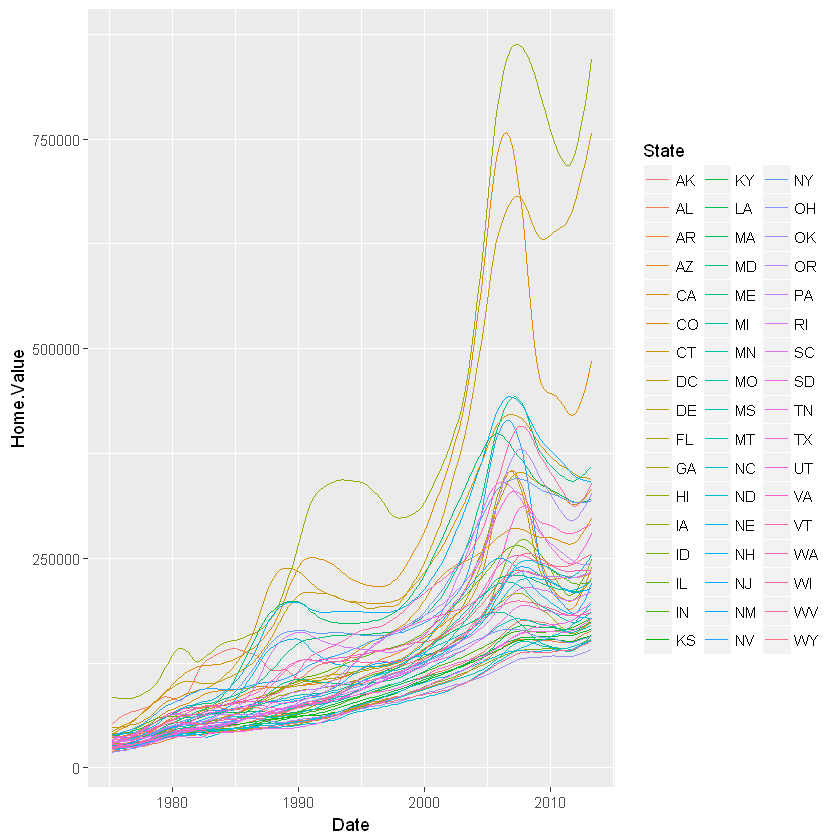

In [34]:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

<html><b>Faceting</b></html>

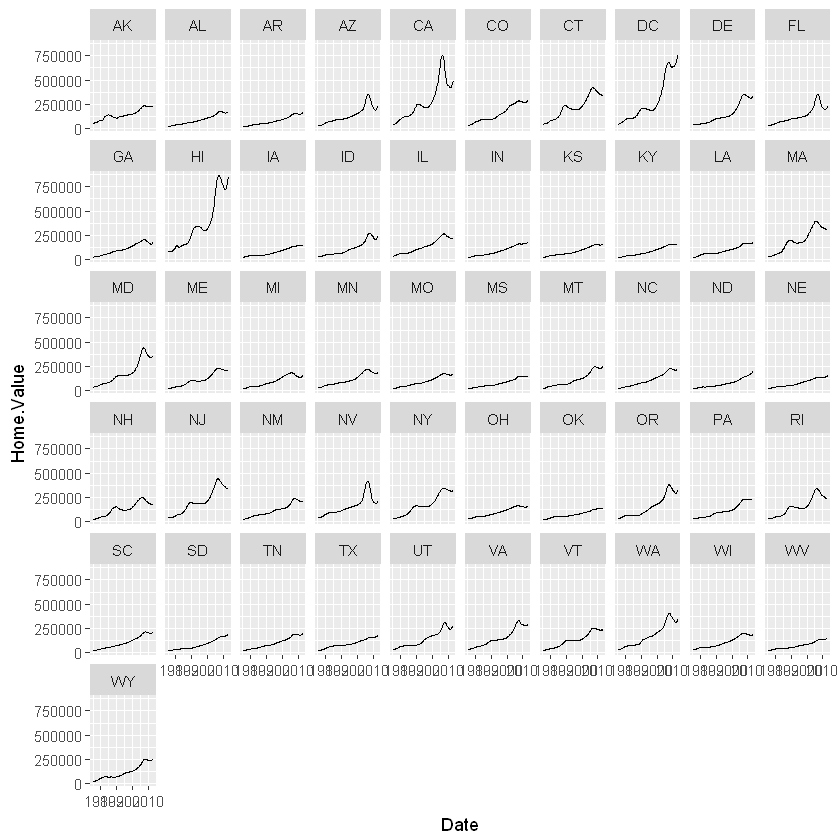

In [35]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))

<html><b>Themes</b></html>

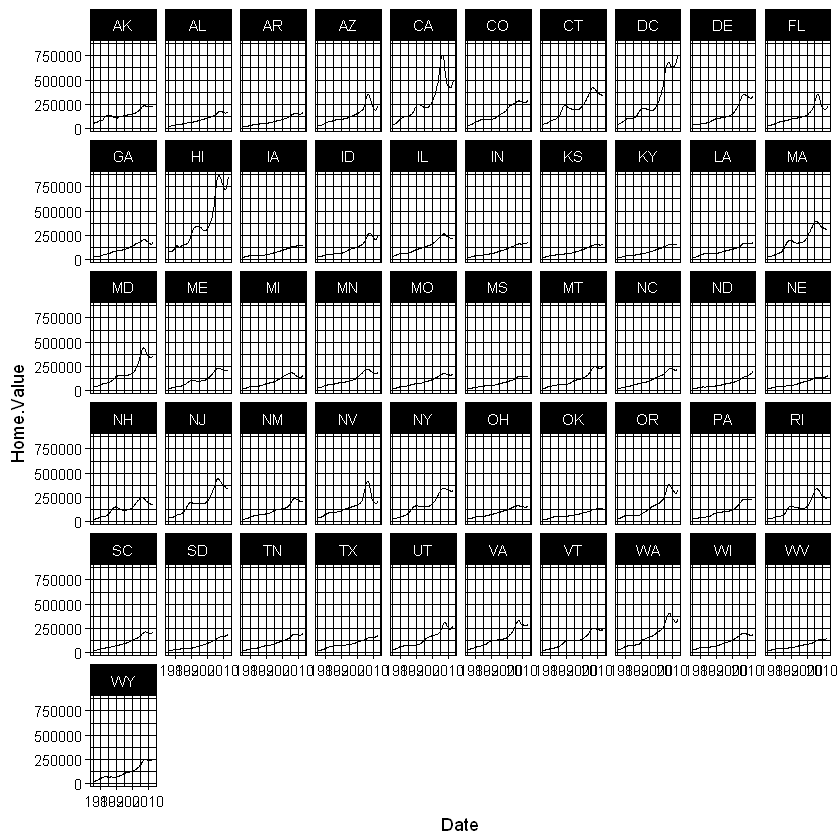

In [36]:
p5 + theme_linedraw()

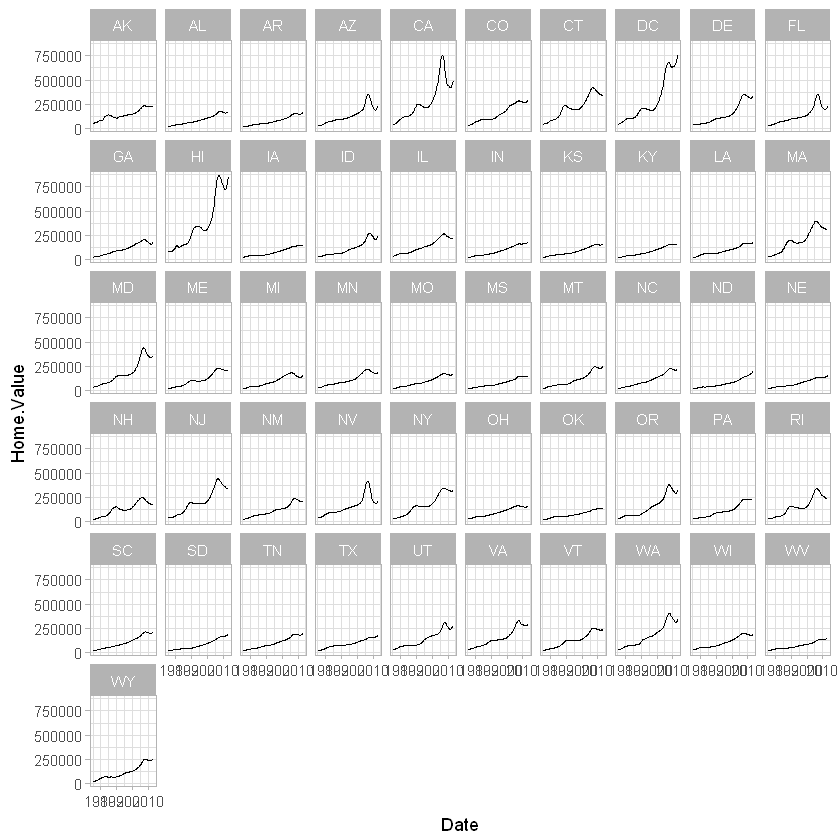

In [37]:
p5 + theme_light()

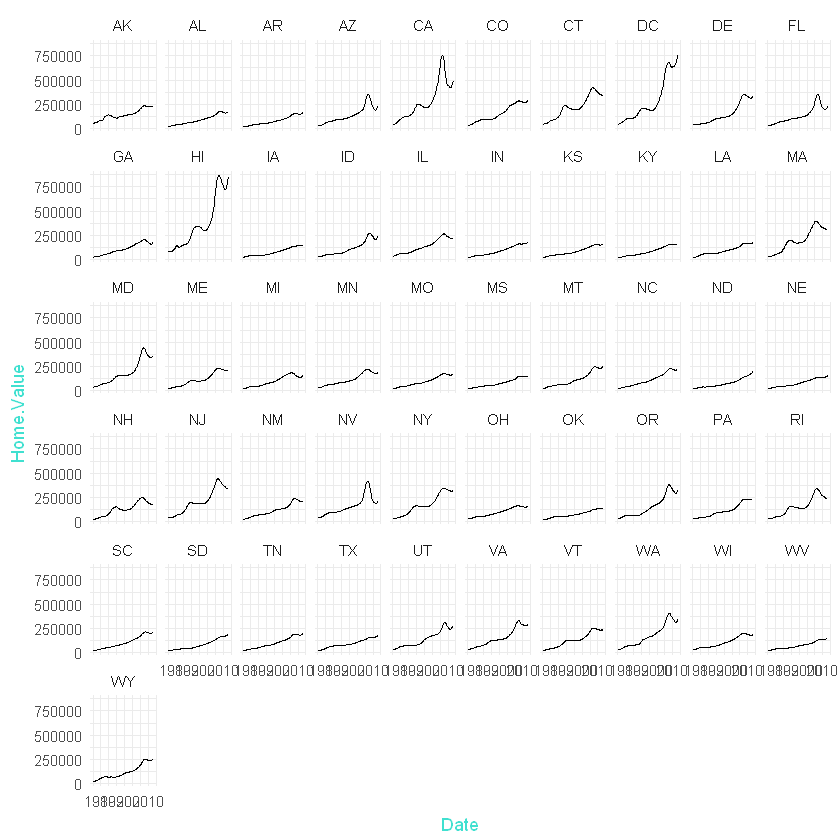

In [38]:
p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))

<html><b>Creating and saving new themes</b></html>

Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

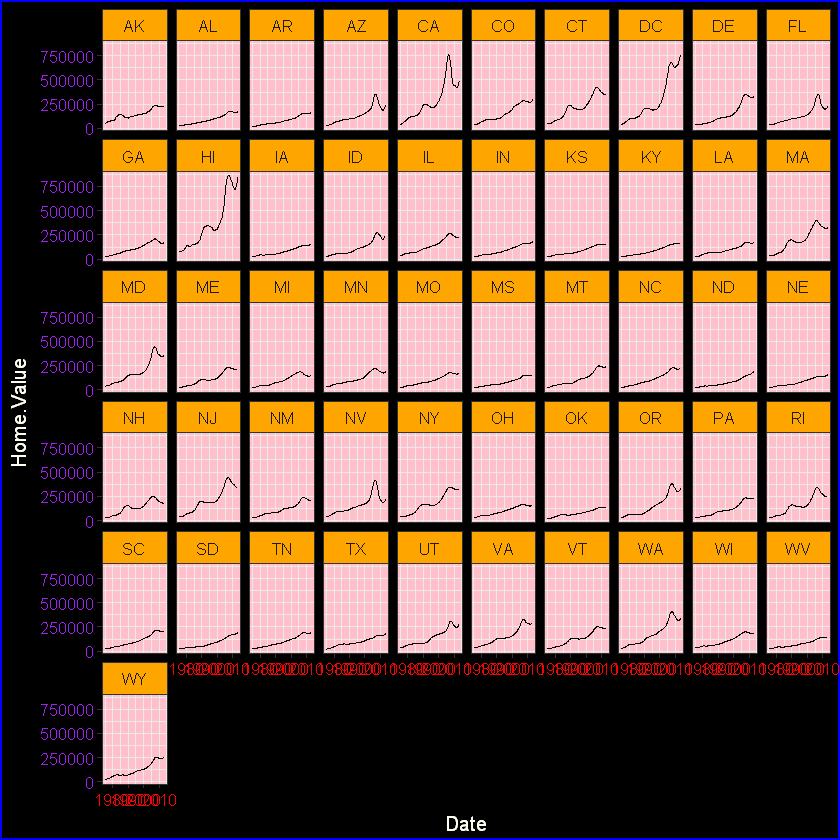

In [41]:
theme_new <- theme_bw() +
  theme(plot.background = element_rect(size = 1, color = "blue", fill = "black"),
        text=element_text(size = 12, family = "Serif", color = "ivory"),
        axis.text.y = element_text(colour = "purple"),
        axis.text.x = element_text(colour = "red"),
        panel.background = element_rect(fill = "pink"),
        strip.background = element_rect(fill = "orange"))

p5 + theme_new